# import packages

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read the data

In [2]:
# read file preventing the first row from becoming the header
df = pd.read_csv('abalone.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## set column names as provided in dataset documentation

In [3]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Visceral Weight', 'Shell Weight', 'Rings']
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Visceral Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.isnull().sum()

Sex                0
Length             0
Diameter           0
Height             0
Whole Weight       0
Shucked Weight     0
Visceral Weight    0
Shell Weight       0
Rings              0
dtype: int64

## according to the dataset documentation
    age = 1.5 + rings
    
Since it is direst realtionsip, we can use Rings for Age detection

In [6]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Visceral Weight', 'Shell Weight', 'Age']

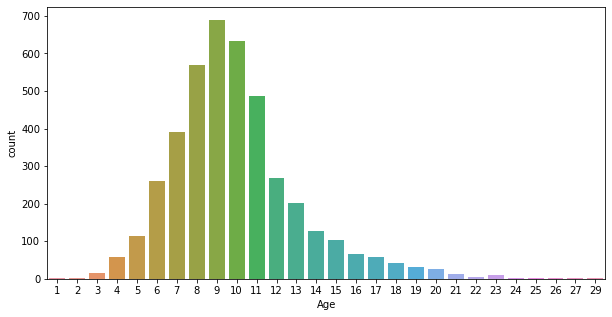

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Sex = le.fit_transform(df.Sex)
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Visceral Weight,Shell Weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# check correlation

In [9]:
df.corr().Age.sort_values(ascending=False)

Age                1.000000
Shell Weight       0.627574
Diameter           0.574660
Height             0.557467
Length             0.556720
Whole Weight       0.540390
Visceral Weight    0.503819
Shucked Weight     0.420884
Sex               -0.034627
Name: Age, dtype: float64

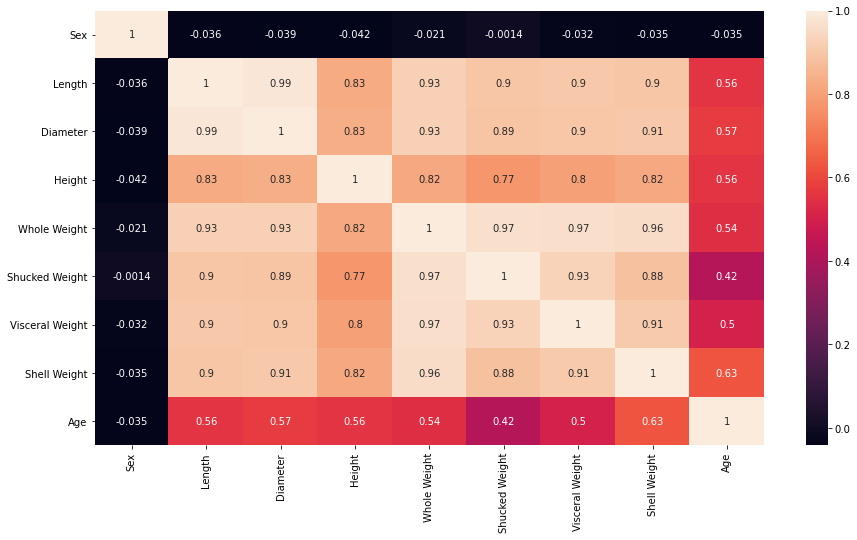

In [10]:
corr = df.corr()
# plot heatmap

plt.figure(figsize=(15,8))

sns.heatmap(
    corr, 
    xticklabels=df.columns,
    yticklabels=df.columns,
    annot=True
)

In [11]:
df_corr_drop = df.drop(['Length', 'Visceral Weight', 'Shucked Weight', 'Whole Weight', 'Sex'], axis=1)
df_corr_drop.head()

,Diameter,Height,Shell Weight,Age
0,0.365,0.095,0.150,15
1,0.265,0.090,0.070,7
2,0.420,0.135,0.210,9
3,0.365,0.125,0.155,10
4,0.255,0.080,0.055,7


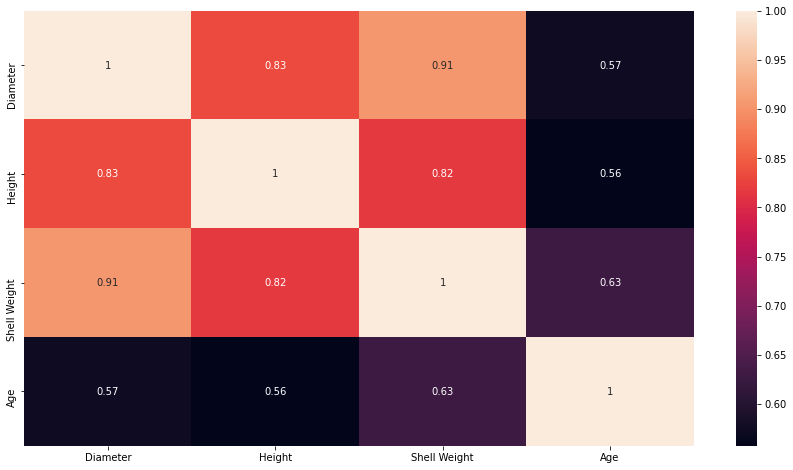

In [12]:
corr = df_corr_drop.corr()
# plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(
    corr, 
    xticklabels=df_corr_drop.columns,
    yticklabels=df_corr_drop.columns,
    annot=True
)

# examine distribution

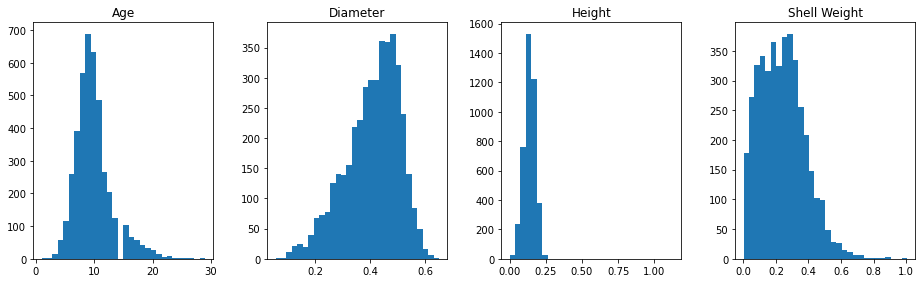

In [13]:
_ = df_corr_drop.hist(figsize=(20,10), grid=False, layout=(2, 5), bins = 30)

# check pair plot

In [14]:
import numpy as np
categorical_columns = df_corr_drop.select_dtypes(include=[np.object]).columns
numerical_columns = df_corr_drop.select_dtypes(include=[np.number]).columns

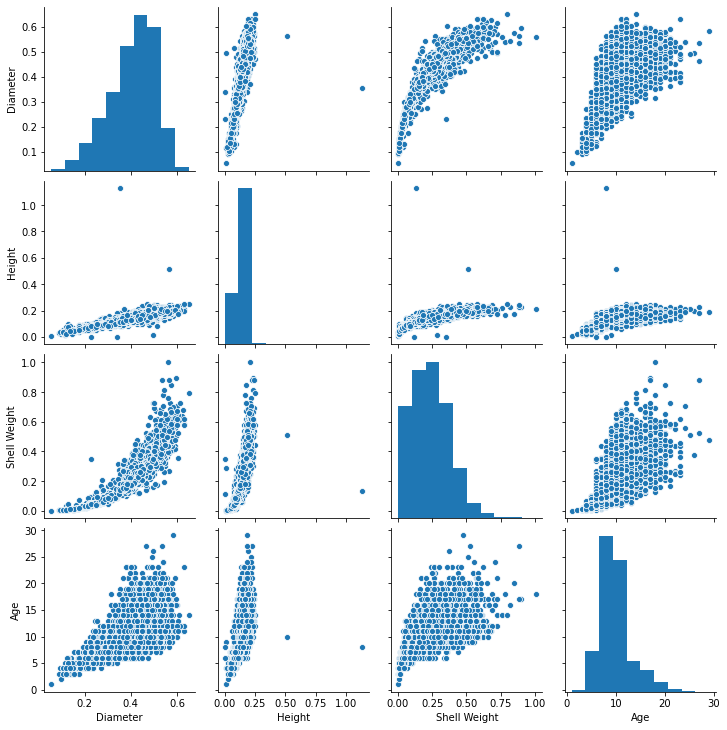

In [15]:
sns.pairplot(df_corr_drop[numerical_columns])

# There seem to be a lot of outliers

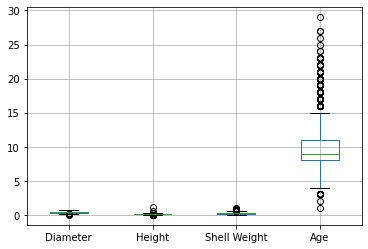

In [16]:
df_corr_drop.boxplot()

# examine height outliers

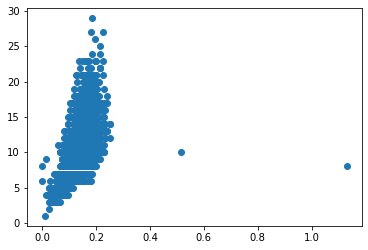

In [17]:
plt.scatter(x = df_corr_drop['Height'], y=df_corr_drop['Age'])

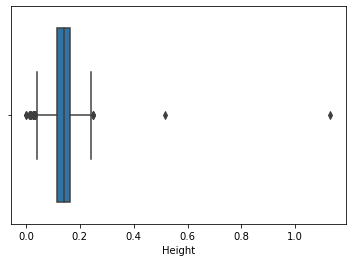

In [18]:
sns.boxplot(x=df_corr_drop['Height'])

### try to remove outliers using z-score

In [19]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_corr_drop.Height))

z

array([1.06442415, 1.18397831, 0.10799087, ..., 1.56576738, 0.25067161,
       1.32665906])

In [20]:
z_score_filterd = df_corr_drop[ z <= 3]

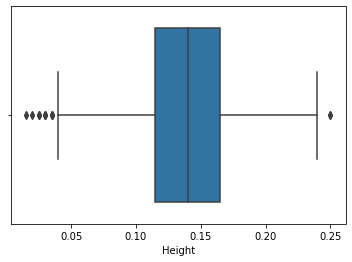

In [21]:
sns.boxplot(x=z_score_filterd['Height'])

### as apparent, the biggest outliers have been removed

# Examine age outliers

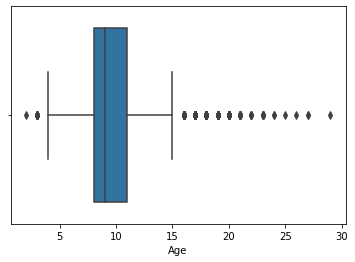

In [22]:
sns.boxplot(x=z_score_filterd.Age)

### examine the frequency of samples

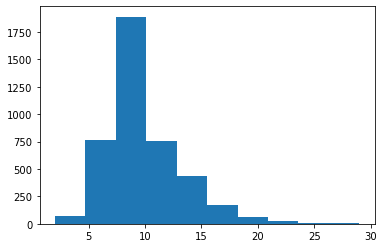

In [23]:
_ =plt.hist(z_score_filterd.Age)

As per the frequency plot as well as dataset documentation, not many samples are available for the age more than 25. Thus, they come up as outliers. Thus, we proceed to keep them in.

# Typically after this, we examine each and every column for any issues
## You can modify this example notebook to do the same

In [24]:
X = z_score_filterd.iloc[:, :-1]
y = z_score_filterd.Age.astype('int')

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=47)

In [26]:
pd.DataFrame([y_train.value_counts(), y_test.value_counts()])

,2,3,4,5,6,7,8,9,10,11,...,19,20,21,22,23,24,25,26,27,29
Age,1.0,12.0,37.0,83.0,192.0,286.0,385.0,472.0,431.0,329.0,...,19.0,20.0,10.0,4.0,3.0,2.0,1.0,1.0,2.0,1.0
Age,NaN,3.0,20.0,32.0,66.0,105.0,181.0,217.0,202.0,158.0,...,13.0,6.0,4.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN


As apparent, due to lack of samples, the classes with only one or two samples will have no test data to evaluate the performance. 

# Attempt this problem as a regression problem

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth':[3,4,5,6],
    'n_estimators':range(500,700,50)
}

grid_model = GridSearchCV(estimator=XGBRegressor(), param_grid=param, verbose=2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=3, n_estimators=500, total=   0.7s
[CV] max_depth=3, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................... max_depth=3, n_estimators=500, total=   0.4s
[CV] max_depth=3, n_estimators=500 ...................................
[CV] .................... max_depth=3, n_estimators=500, total=   0.3s
[CV] max_depth=3, n_estimators=500 ...................................
[CV] .................... max_depth=3, n_estimators=500, total=   0.3s
[CV] max_depth=3, n_estimators=500 ...................................
[CV] .................... max_depth=3, n_estimators=500, total=   0.3s
[CV] max_depth=3, n_estimators=550 ...................................
[CV] .................... max_depth=3, n_estimators=550, total=   0.3s
[CV] max_depth=3, n_estimators=550 ...................................
[CV] .................... max_depth=3, n_estimators=550, total=   0.3s
[CV] max_depth=3, n_estimators=550 ...................................
[CV] .................... max_depth=3, n_estimators=550, total=   0.3s
[CV] max_depth=3, n_estimators=550 ...................................
[CV] .

[CV] .................... max_depth=5, n_estimators=650, total=   0.6s
[CV] max_depth=6, n_estimators=500 ...................................
[CV] .................... max_depth=6, n_estimators=500, total=   0.6s
[CV] max_depth=6, n_estimators=500 ...................................
[CV] .................... max_depth=6, n_estimators=500, total=   0.6s
[CV] max_depth=6, n_estimators=500 ...................................
[CV] .................... max_depth=6, n_estimators=500, total=   0.6s
[CV] max_depth=6, n_estimators=500 ...................................
[CV] .................... max_depth=6, n_estimators=500, total=   0.6s
[CV] max_depth=6, n_estimators=500 ...................................
[CV] .................... max_depth=6, n_estimators=500, total=   0.6s
[CV] max_depth=6, n_estimators=550 ...................................
[CV] .................... max_depth=6, n_estimators=550, total=   0.6s
[CV] max_depth=6, n_estimators=550 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   42.3s finished


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [45]:
grid_model.best_params_

{'max_depth': 3, 'n_estimators': 500}

In [ ]:
model = X

In [32]:
predict = model_xgr.predict(X_test)
predict_classification = np.round(predict)
predict

array([ 9.51551 ,  9.571782,  8.60782 , ..., 10.441487, 10.070984,
       10.472526], dtype=float32)

## evaluate performance as regression problem

In [35]:
from sklearn.metrics import r2_score

r2_score(y_test, predict)

0.37145487282228984

## evaluate performance as a classification problem

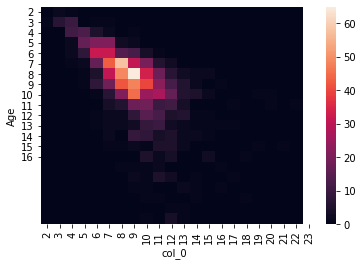

In [33]:
sns.heatmap(
    pd.crosstab(y_test, np.array(predict_classification).ravel().astype('int')), 
    xticklabels=range(2,24),
    yticklabels=range(2,17),
)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, np.array(predict_classification).ravel().astype('int'))

0.20047923322683706